### Question :

- Take an image. Add noise to it. You may add Gaussian noise for three different noise intensities. Display the noisy images.
- Take an image. Blur it. You may use Gaussian blur, motion blur and defocus blur. Display the blurred images.
- For the above two cases, measure the following parameters between the original image and its noisy/blurred versions.
   - PSNR (Peak Signal to Noise Ratio)
   - SSIM( Structural Similarity Index Measure)
   - LPIPS( Learned Perceptual Image Patch Similarity).

`Load the image`

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from math import log10, sqrt 
from skimage import metrics
import torch, torchvision
from torchmetrics.image.lpip import LearnedPerceptualImagePatchSimilarity

(-0.5, 1499.5, 1000.5, -0.5)

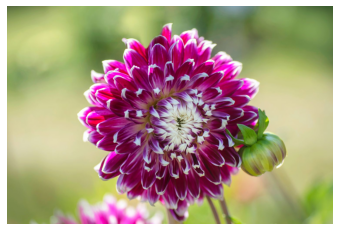

In [2]:
img = cv2.imread('Images/flower.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')

`Gaussian Noise`

(-0.5, 1499.5, 1000.5, -0.5)

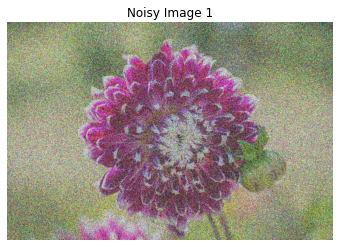

In [3]:
mean1, std_dev1 = 0, 180
noise1 = np.random.normal(mean1, std_dev1, img.shape)
noisy_img1 = img + noise1
noisy_img1 = np.clip(noisy_img1, 0, 255)
noisy_img1 = noisy_img1.astype(np.uint8)

plt.figure()
plt.imshow(noisy_img1)
plt.title('Noisy Image 1')
plt.axis('off')

(-0.5, 1499.5, 1000.5, -0.5)

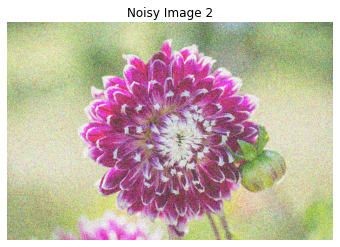

In [4]:
mean2, std_dev2 = 45, 90
noise2 = np.random.normal(mean2, std_dev2, img.shape)
noisy_img2 = img + noise2
noisy_img2 = np.clip(noisy_img2, 0, 255)
noisy_img2 = noisy_img2.astype(np.uint8)

plt.figure()
plt.imshow(noisy_img2)
plt.title('Noisy Image 2')
plt.axis('off')

(-0.5, 1499.5, 1000.5, -0.5)

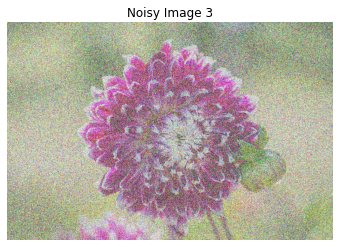

In [5]:
mean3, std_dev3 = 64, 198
noise3 = np.random.normal(mean3, std_dev3, img.shape)
noisy_img3 = img + noise3
noisy_img3 = np.clip(noisy_img3, 0, 255)
noisy_img3 = noisy_img3.astype(np.uint8)

plt.figure()
plt.imshow(noisy_img3)
plt.title('Noisy Image 3')
plt.axis('off')

`Gaussian Blur`

(-0.5, 1499.5, 1000.5, -0.5)

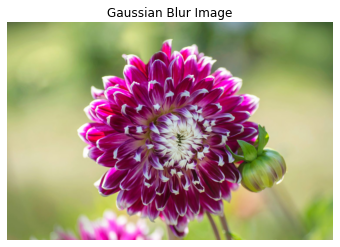

In [6]:
blurred_img = cv2.GaussianBlur(img, (3, 3), 0)
plt.figure()
plt.imshow(blurred_img)
plt.title('Gaussian Blur Image')
plt.axis('off')

`Motion Blur`

(-0.5, 1499.5, 1000.5, -0.5)

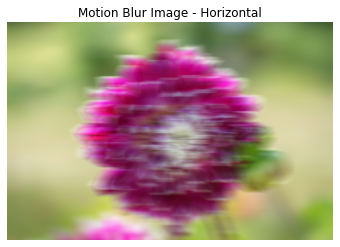

In [7]:
# motion blur horizontal
size = 90
kernel_motion_blur = np.zeros((size, size))
kernel_motion_blur[int((size-1)/2), :] = np.ones(size)
kernel_motion_blur = kernel_motion_blur / size
h_motion_blur = cv2.filter2D(img, -1, kernel_motion_blur)
plt.imshow(h_motion_blur)
plt.title('Motion Blur Image - Horizontal')
plt.axis('off')

(-0.5, 1499.5, 1000.5, -0.5)

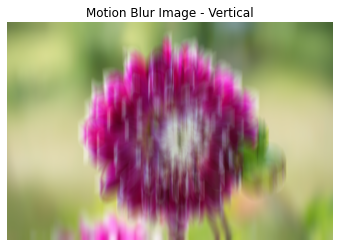

In [8]:
# motion blur vertical
size = 90
kernel_motion_blur = np.zeros((size, size))
kernel_motion_blur[:, int((size-1)/2)] = np.ones(size)
kernel_motion_blur = kernel_motion_blur / size
v_motion_blur = cv2.filter2D(img, -1, kernel_motion_blur)
plt.imshow(v_motion_blur)
plt.title('Motion Blur Image - Vertical')
plt.axis('off')

`Defocus Blur`

(-0.5, 1499.5, 1000.5, -0.5)

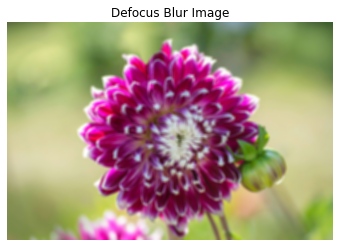

In [9]:
defocus_blur = cv2.blur(img, (15, 15))
plt.imshow(defocus_blur)
plt.title('Defocus Blur Image')
plt.axis('off')

`PSNR`

Peak Signal-to-noise ratio : \
Ratio between maximum possible power of an image and the power of the corrupting noise which affects the quality of the image

In [10]:
def PSNR(original, distorted): 
    mse = np.mean((original - distorted)**2)
    if mse == 0: # no noise
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

In [11]:
print('PSNR of Noisy Image 1:', PSNR(img, noisy_img1), 'dB')
print('PSNR of Noisy Image 2:', PSNR(img, noisy_img2), 'dB')
print('PSNR of Noisy Image 3:', PSNR(img, noisy_img3), 'dB')

print('PSNR of Gaussian Blur Image:', PSNR(img, blurred_img), 'dB')
print('PSNR of Motion Blur Image - Horizontal:', PSNR(img, h_motion_blur), 'dB')
print('PSNR of Motion Blur Image - Vertical:', PSNR(img, v_motion_blur), 'dB')
print('PSNR of Defocus Blur Image:', PSNR(img, defocus_blur), 'dB')

PSNR of Noisy Image 1: 27.941329633792584 dB
PSNR of Noisy Image 2: 27.900686351584362 dB
PSNR of Noisy Image 3: 27.930473825124462 dB
PSNR of Gaussian Blur Image: 42.301800677421085 dB
PSNR of Motion Blur Image - Horizontal: 31.1608454862221 dB
PSNR of Motion Blur Image - Vertical: 31.17010249585567 dB
PSNR of Defocus Blur Image: 33.50227516354398 dB


`SSIM : Structural Similarity Index`

Asseses Structural Similarity between two images. Considers luminance, contrast and structure. Gives a score between -1 (dissimilar) and 1 (identical)

In [12]:
def SSIM(original, distorted):
    img1_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
    img2_gray = cv2.cvtColor(distorted, cv2.COLOR_BGR2GRAY)
    ssim = metrics.structural_similarity(img1_gray, img2_gray, full = True)
    return round(ssim[0], 2)

In [13]:
print('SSIM of Noisy Image 1:', SSIM(img, noisy_img1), 'dB')
print('SSIM of Noisy Image 2:', SSIM(img, noisy_img2), 'dB')
print('SSIM of Noisy Image 3:', SSIM(img, noisy_img3), 'dB')

print('SSIM of Gaussian Blur Image:', SSIM(img, blurred_img), 'dB')
print('SSIM of Motion Blur Image - Horizontal:', SSIM(img, h_motion_blur), 'dB')
print('SSIM of Motion Blur Image - Vertical:', SSIM(img, v_motion_blur), 'dB')
print('SSIM of Defocus Blur Image:', SSIM(img, defocus_blur), 'dB')

SSIM of Noisy Image 1: 0.04 dB
SSIM of Noisy Image 2: 0.09 dB
SSIM of Noisy Image 3: 0.04 dB
SSIM of Gaussian Blur Image: 0.99 dB
SSIM of Motion Blur Image - Horizontal: 0.76 dB
SSIM of Motion Blur Image - Vertical: 0.76 dB
SSIM of Defocus Blur Image: 0.84 dB


` LPIPS : Learned Perpetual Image Patch Similarity`

Computes the similarity between the activations of two image patched for some pre-defined network.

In [14]:
def LPIPS(original, distorted):
    img1 = torch.from_numpy(np.array(original)).float()
    img2 = torch.from_numpy(np.array(distorted)).float()
    img1 = img1.unsqueeze(0).permute(0,3,1,2).float()/127.5 -1
    img2 = img2.unsqueeze(0).permute(0,3,1,2).float()/127.5 -1
    lpips = LearnedPerceptualImagePatchSimilarity(net_type='squeeze')
    return lpips(img1,img2).item()

In [15]:
print('LPIPS of Noisy Image 1:', LPIPS(img, noisy_img1), 'dB')
print('LPIPS of Noisy Image 2:', LPIPS(img, noisy_img2), 'dB')
print('LPIPS of Noisy Image 3:', LPIPS(img, noisy_img3), 'dB')

print('LPIPS of Gaussian Blur Image:', LPIPS(img, blurred_img), 'dB')
print('LPIPS of Motion Blur Image - Horizontal:', LPIPS(img, h_motion_blur), 'dB')
print('LPIPS of Motion Blur Image - Vertical:', LPIPS(img, v_motion_blur), 'dB')
print('LPIPS of Defocus Blur Image:', LPIPS(img, defocus_blur), 'dB')

LPIPS of Noisy Image 1: 0.9988030791282654 dB
LPIPS of Noisy Image 2: 0.9387622475624084 dB
LPIPS of Noisy Image 3: 1.00825834274292 dB
LPIPS of Gaussian Blur Image: 0.018908729776740074 dB
LPIPS of Motion Blur Image - Horizontal: 0.2628476023674011 dB
LPIPS of Motion Blur Image - Vertical: 0.27151361107826233 dB
LPIPS of Defocus Blur Image: 0.20675437152385712 dB
